In [1]:
%matplotlib inline

In [2]:
import os
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: /home/p22g5/AnomaliesRecycling/notebooks


In [3]:
#os.chdir('AnomaliesRecycling')
os.chdir('..')
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: /home/p22g5/AnomaliesRecycling



Transfer Learning
==============================================
Based on this [tutorial](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html#load-data)


In [4]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

import torchvision
from torchvision import models, transforms
import matplotlib.pyplot as plt

from src.transfer_learning import TransferLearningTrainer
from src.cam import CAM


plt.ion()   # interactive mode

In [5]:
torch.cuda.is_available()
torch.cuda.current_device()
torch.cuda.device_count()

1

Load Data and Data Augmentation
---------

In [6]:
transferLearningTrainer = TransferLearningTrainer()

Visualize a few images



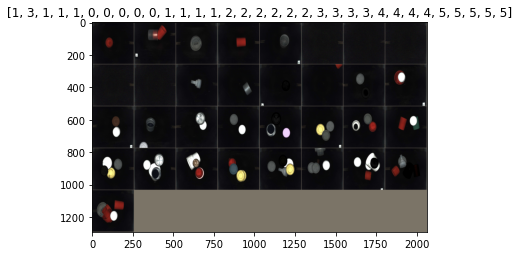

In [7]:
# Get a batch of training data
sample = next(iter(transferLearningTrainer.dataloaders['train']))
inputs, classes = sample['image'], sample['label']
# Make a grid from batch
out = torchvision.utils.make_grid(inputs)
transferLearningTrainer.imshow(out, [transferLearningTrainer.class_names[x] for x in classes])

Training the model
------------------

Finetuning the convnet
----------------------

Load a pretrained model and reset final fully connected layer.




In [8]:
import numpy as np
import sklearn
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

y_train = transferLearningTrainer.image_datasets['train'].img_labels['count'].tolist()
class_sample_count = np.array([len(np.where(y_train == t)[0]) for t in np.unique(y_train)])

#weight = 1. / np.sqrt(class_sample_count) # (*20): 0.830330-1, (): 0.846847-2, (sqrt): 0.891892-4
weight = 1. - class_sample_count / sum(class_sample_count) # 0.932432-3
#weight = sklearn.utils.class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train) # 0.843844-5

weight = torch.tensor(weight, dtype=torch.float).to(DEVICE)

In [21]:
model_name = "test2"
model_ft = models.resnet50(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 6, since we have 6 classes
model_ft.fc = nn.Linear(num_ftrs, len(transferLearningTrainer.class_names))
criterion = nn.CrossEntropyLoss(weight=weight)
# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=10, gamma=0.1)

 ***Train and evaluate***

In [22]:
model_ft = transferLearningTrainer.train_model(model=model_ft,
                                               criterion=criterion,
                                               optimizer=optimizer_ft,
                                               scheduler=exp_lr_scheduler,
                                               num_epochs=50,
                                               model_name=model_name,
                                               early_stop=False)

Epoch 0/49
----------
train Loss: 0.5384 Acc: 0.7958 De_Acc : 0.9444 MAE: 0.2531 MSE: 0.3958 R^2: 0.8558
test Loss: 1.0130 Acc: 0.4970 De_Acc : 0.6532 MAE: 0.5045 MSE: 0.5075 R^2: 0.2958

Epoch 1/49
----------
train Loss: 0.1944 Acc: 0.9317 De_Acc : 0.9908 MAE: 0.0686 MSE: 0.0691 R^2: 0.9748
test Loss: 0.6696 Acc: 0.6682 De_Acc : 0.7883 MAE: 0.3333 MSE: 0.3363 R^2: 0.5333

Epoch 2/49
----------
train Loss: 0.1140 Acc: 0.9615 De_Acc : 0.9959 MAE: 0.0387 MSE: 0.0389 R^2: 0.9858
test Loss: 0.4536 Acc: 0.7868 De_Acc : 0.8363 MAE: 0.2147 MSE: 0.2177 R^2: 0.6979

Epoch 3/49
----------
train Loss: 0.0710 Acc: 0.9784 De_Acc : 0.9972 MAE: 0.0216 MSE: 0.0218 R^2: 0.9921
test Loss: 0.3705 Acc: 0.9054 De_Acc : 0.9444 MAE: 0.0976 MSE: 0.1036 R^2: 0.8562

Epoch 4/49
----------
train Loss: 0.0479 Acc: 0.9859 De_Acc : 0.9990 MAE: 0.0141 MSE: 0.0143 R^2: 0.9948
test Loss: 0.3861 Acc: 0.8769 De_Acc : 0.9234 MAE: 0.1246 MSE: 0.1276 R^2: 0.8229

Epoch 5/49
----------
train Loss: 0.0345 Acc: 0.9900 De_Acc 

test Loss: 0.3125 Acc: 0.9309 De_Acc : 0.9730 MAE: 0.0691 MSE: 0.0691 R^2: 0.9042

Epoch 44/49
----------
train Loss: 0.0014 Acc: 1.0000 De_Acc : 1.0000 MAE: 0.0000 MSE: 0.0000 R^2: 1.0000
test Loss: 0.3102 Acc: 0.9309 De_Acc : 0.9730 MAE: 0.0691 MSE: 0.0691 R^2: 0.9042

Epoch 45/49
----------
train Loss: 0.0014 Acc: 1.0000 De_Acc : 1.0000 MAE: 0.0000 MSE: 0.0000 R^2: 1.0000
test Loss: 0.3136 Acc: 0.9309 De_Acc : 0.9730 MAE: 0.0691 MSE: 0.0691 R^2: 0.9042

Epoch 46/49
----------
train Loss: 0.0014 Acc: 1.0000 De_Acc : 1.0000 MAE: 0.0000 MSE: 0.0000 R^2: 1.0000
test Loss: 0.3108 Acc: 0.9309 De_Acc : 0.9730 MAE: 0.0691 MSE: 0.0691 R^2: 0.9042

Epoch 47/49
----------
train Loss: 0.0014 Acc: 1.0000 De_Acc : 1.0000 MAE: 0.0000 MSE: 0.0000 R^2: 1.0000
test Loss: 0.3119 Acc: 0.9309 De_Acc : 0.9730 MAE: 0.0691 MSE: 0.0691 R^2: 0.9042

Epoch 48/49
----------
train Loss: 0.0014 Acc: 1.0000 De_Acc : 1.0000 MAE: 0.0000 MSE: 0.0000 R^2: 1.0000
test Loss: 0.3049 Acc: 0.9309 De_Acc : 0.9730 MAE: 0.06

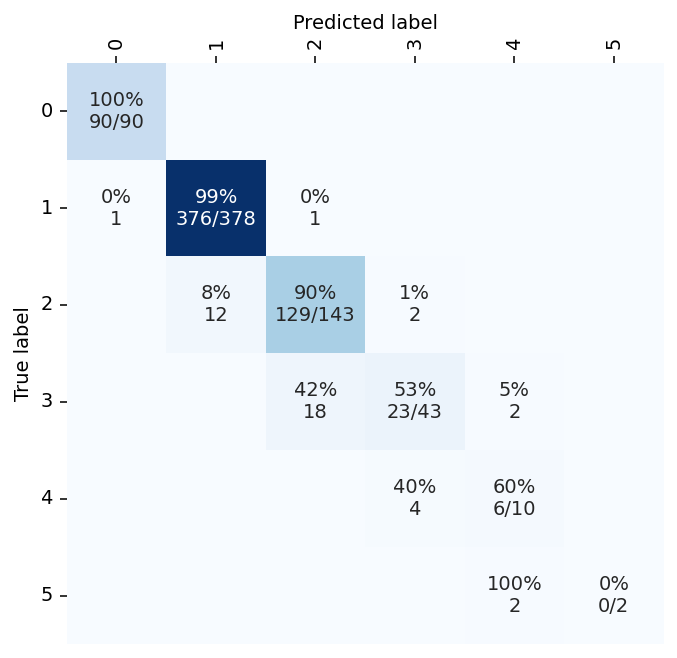

In [23]:
transferLearningTrainer.print_confusion_matrix(model_ft)

In [24]:
import pandas as pd

transferLearningTrainer.print_misclassified(model_ft, plot=False)

names, counts, preds = [], [], []
for image, (label, pred) in transferLearningTrainer.misclassified_images.items():
    names.append(image)
    counts.append(label)
    preds.append(pred)
    
df_images = pd.DataFrame({'name': names, 'count': counts, 'pred': preds})
df_images.to_csv('notebooks/temp/misclassified_images_resnet50.csv', index=False)

harder_samples/Anlernbilder (342).jpg
must be 3, but predicted 4
cluttered/Anlerndaten (460).jpg
must be 3, but predicted 2
harder_samples/Anlernbilder (14).jpg
must be 3, but predicted 4
harder_samples/Anlernbilder (154).jpg
must be 5, but predicted 4
harder_samples/Anlernbilder (338).jpg
must be 3, but predicted 2
presorted/trial (973).jpg
must be 2, but predicted 3
cluttered/Anlerndaten (875).jpg
must be 2, but predicted 1
cluttered/Anlerndaten (161).jpg
must be 2, but predicted 1
harder_samples/Anlernbilder (171).jpg
must be 3, but predicted 2
cluttered/Anlerndaten (615).jpg
must be 2, but predicted 1
harder_samples/Anlernbilder (193).jpg
must be 3, but predicted 2
harder_samples/Anlernbilder (149).jpg
must be 3, but predicted 2
harder_samples/Anlernbilder (362).jpg
must be 4, but predicted 3
harder_samples/Anlernbilder (88).jpg
must be 3, but predicted 2
harder_samples/Anlernbilder (109).jpg
must be 3, but predicted 2
cluttered/Anlerndaten (398).jpg
must be 2, but predicted 1
hard

/cvhci/temp/p22g5/data/presorted/trial (726).jpg


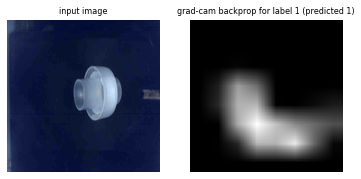

In [12]:
model_name = "test2"
model_name += "_weights.pth"
model_ft = models.resnet50()
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 6, since we have 6 classes
model_ft.fc = torch.nn.Linear(num_ftrs, len(transferLearningTrainer.class_names))
model_ft.load_state_dict(torch.load(transferLearningTrainer.MODELS_DIR + model_name))
# print(model_ft)

cam = CAM(transferLearningTrainer)
cam.print_cam(model_ft)

In [ ]:
!reload_ext tensorboard
!tensorboard --logdir /cvhci/temp/p22g5/runs/

***Filenames where validation failed***

ConvNet as fixed feature extractor
----------------------------------

In [ ]:
model_name = "ResNet18_test"
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False
# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, len(transferLearningTrainer.class_names))
criterion = nn.CrossEntropyLoss()
# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)
# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

Train and evaluate
^^^^^^^^^^^^^^^^^^

On CPU this will take about half the time compared to previous scenario.
This is expected as gradients don't need to be computed for most of the
network. However, forward does need to be computed.




In [ ]:
model_conv = transferLearningTrainer.train_model(model_conv,
                                                 criterion,
                                                 optimizer_conv,
                                                 exp_lr_scheduler,
                                                 num_epochs=50,
                                                 model_name=model_name)

In [ ]:
transferLearningTrainer.visualize_model(model_conv)